In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_ug = pd.read_excel('raw data/Uganda - 2024 10 02(v1).xlsx', sheet_name='ug_fact_numeracy_result')
df_ug.to_csv('numericy.csv')

In [2]:
df_ug.head()

,ChildrenId,AcademicYearName,AcademicYearId,Project,Year,Baseline,EoR1,EoR2,EoR3,Endline,...,EoR2_Endline,ImproveToLevel4Level5,Level4Achieved,Level5Achieved,AtLeastAchievedLevel4,Gender,IsCUCSatisfied?,Cycle 2,Identity_Number,SchoolId
0,36827,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,Level 3-Number Recognition​(20-100)​,NaN,NaN,...,NaN,False,False,False,False,Female,NaN,Numeracy-Cycle 1,20230301144429,248
1,37730,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,NaN,NaN,...,NaN,False,False,False,False,Female,NaN,Numeracy-Cycle 1,20230227130059,248
2,36808,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,Level 3-Number Recognition​(20-100)​,NaN,NaN,...,NaN,False,False,False,False,Female,NaN,Numeracy-Cycle 1,20230302160714,248
3,36833,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,NaN,NaN,...,NaN,False,False,False,False,Female,NaN,Numeracy-Cycle 1,20230301095638,248
4,36834,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,Level 2-Basic Addition and Subtraction(0-20)​,NaN,NaN,...,NaN,False,False,False,False,Male,NaN,Numeracy-Cycle 1,20230301094740,248


In [3]:
df_ug.columns

Index(['ChildrenId', 'AcademicYearName', 'AcademicYearId', 'Project', 'Year',
       'Baseline', 'EoR1', 'EoR2', 'EoR3', 'Endline', 'Baseline_Endline',
       'Baseline_EoR1', 'EoR1_EoR2', 'EoR2_EoR3', 'EoR2_Endline',
       'ImproveToLevel4Level5', 'Level4Achieved', 'Level5Achieved',
       'AtLeastAchievedLevel4', 'Gender', 'IsCUCSatisfied?', 'Cycle 2',
       'Identity_Number', 'SchoolId'],
      dtype='object')

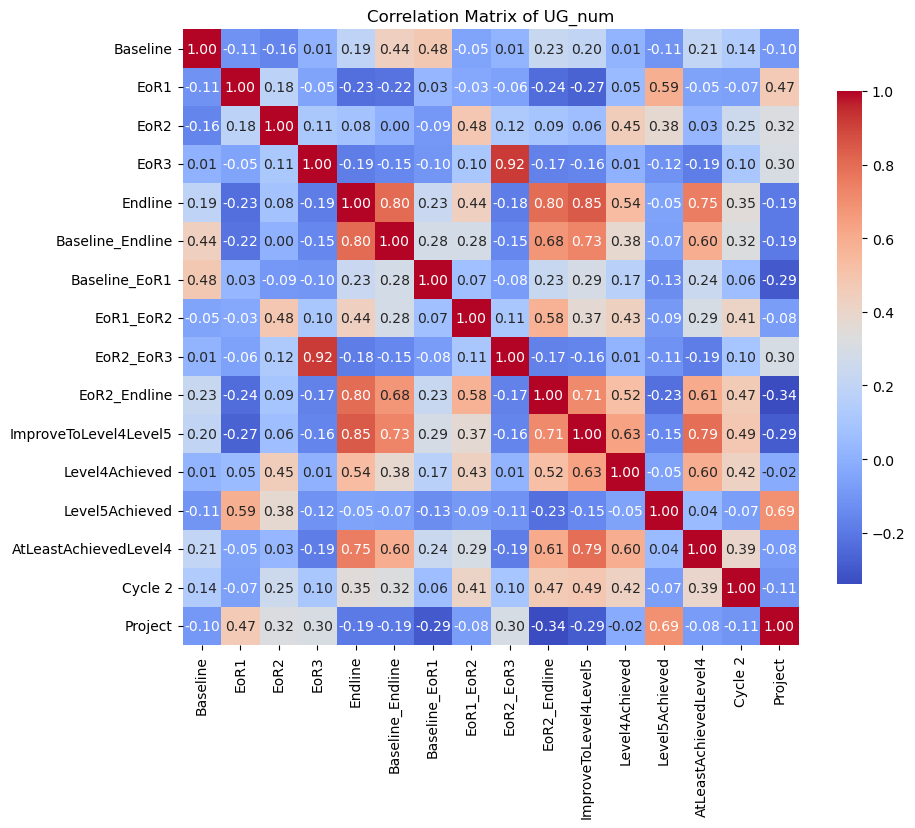

In [5]:
data = df_ug

data['ImproveToLevel4Level5'] = data['ImproveToLevel4Level5'].astype(int)
data['Level4Achieved'] = data['Level4Achieved'].astype(int)
data['Level5Achieved'] = data['Level5Achieved'].astype(int)
data['AtLeastAchievedLevel4'] = data['AtLeastAchievedLevel4'].astype(int)

# Drop non-numeric columns that are not useful for correlation
non_numeric_cols = ['ChildrenId', 'AcademicYearName', 'AcademicYearId', 'Identity_Number', 'IsCUCSatisfied?', 'Gender', 'Cycle 2', 'Year', 'Project', 'SchoolId']
data_numeric = data.drop(columns=non_numeric_cols)
def encode_levels(column):
    return column.str.strip().factorize()[0]

cols = ['Baseline', 'EoR1', 'EoR2', 'EoR3', 'Endline', 'Baseline_Endline', 'Baseline_EoR1', 'EoR1_EoR2', 'EoR2_EoR3', 'EoR2_Endline', 'Cycle 2', 'Project']
for col in cols:
    data_numeric[col] = encode_levels(data[col])

# # Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of UG_num')
plt.show()

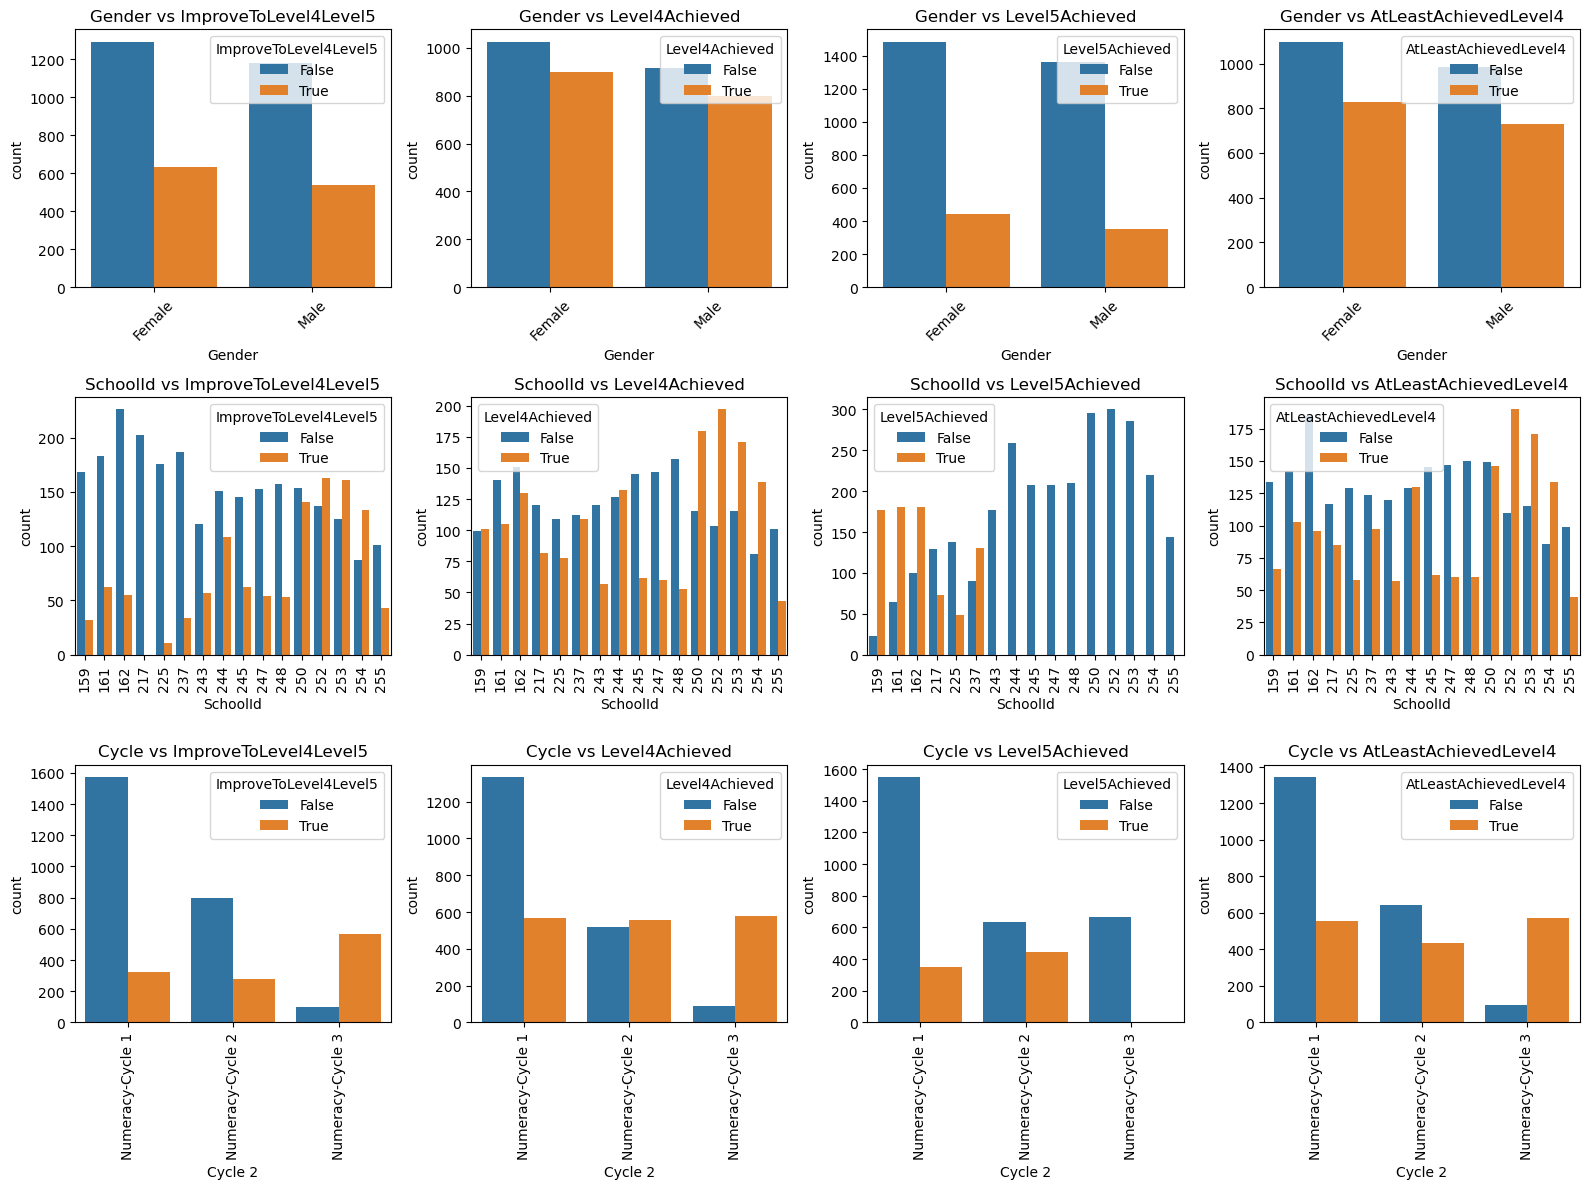

In [10]:
# First, let's reload the original dataset and clean the data without any modifications from previous attempts.

# Reload the original file
data_original = df_ug.copy()

# Define the target variables directly from the original dataset
target_variables = ['ImproveToLevel4Level5', 'Level4Achieved', 'Level5Achieved', 'AtLeastAchievedLevel4']

# Ensure these target columns are converted to boolean for visualization
data_original[target_variables] = data_original[target_variables].fillna(False).astype(bool)

# Now, let's visualize the relationships for Gender, SchoolId, and the target variables from the original dataset
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Gender: Assuming 'Gender' column exists with categories like Male/Female
for i, target in enumerate(target_variables):
    sns.countplot(x='Gender', hue=target, data=data_original, ax=axs[0, i])
    axs[0, i].set_title(f'Gender vs {target}')
    axs[0, i].set_xticklabels(axs[0, i].get_xticklabels(), rotation=45)

# Plot relationships between SchoolId and target variables
for i, target in enumerate(target_variables):
    sns.countplot(x='SchoolId', hue=target, data=data_original, ax=axs[1, i])
    axs[1, i].set_title(f'SchoolId vs {target}')
    axs[1, i].set_xticklabels(axs[1, i].get_xticklabels(), rotation=90)

for i, target in enumerate(target_variables):
    sns.countplot(x='Cycle 2', hue=target, data=data_original, ax=axs[2, i])
    axs[2, i].set_title(f'Cycle vs {target}')
    axs[2, i].set_xticklabels(axs[2, i].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for training
# We will use the Gender, SchoolId, and other relevant columns as features
# Target variable: AtLeastAchievedLevel4 (whether the student achieved at least Level 4)

# Selecting relevant features (Gender, SchoolId, and any numerical columns we can use)
features = ['Gender', 'SchoolId', 'Cycle 2', 'Project']
X = pd.get_dummies(data_original[features], drop_first=True)  # One-hot encode categorical variables
y = data_original['AtLeastAchievedLevel4'].astype(int)  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier as a predictive model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Output the classification report to evaluate the model
classification_report_output = classification_report(y_test, y_pred)

classification_report_output

'              precision    recall  f1-score   support\n\n           0       0.80      0.88      0.84       649\n           1       0.79      0.68      0.73       444\n\n    accuracy                           0.80      1093\n   macro avg       0.80      0.78      0.78      1093\nweighted avg       0.80      0.80      0.79      1093\n'

In [27]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report_dict).transpose()
classification_report_df

,precision,recall,f1-score,support
0,0.800562,0.878274,0.837619,649.000000
1,0.792651,0.680180,0.732121,444.000000
accuracy,0.797804,0.797804,0.797804,0.797804
macro avg,0.796606,0.779227,0.784870,1093.000000
weighted avg,0.797348,0.797804,0.794764,1093.000000


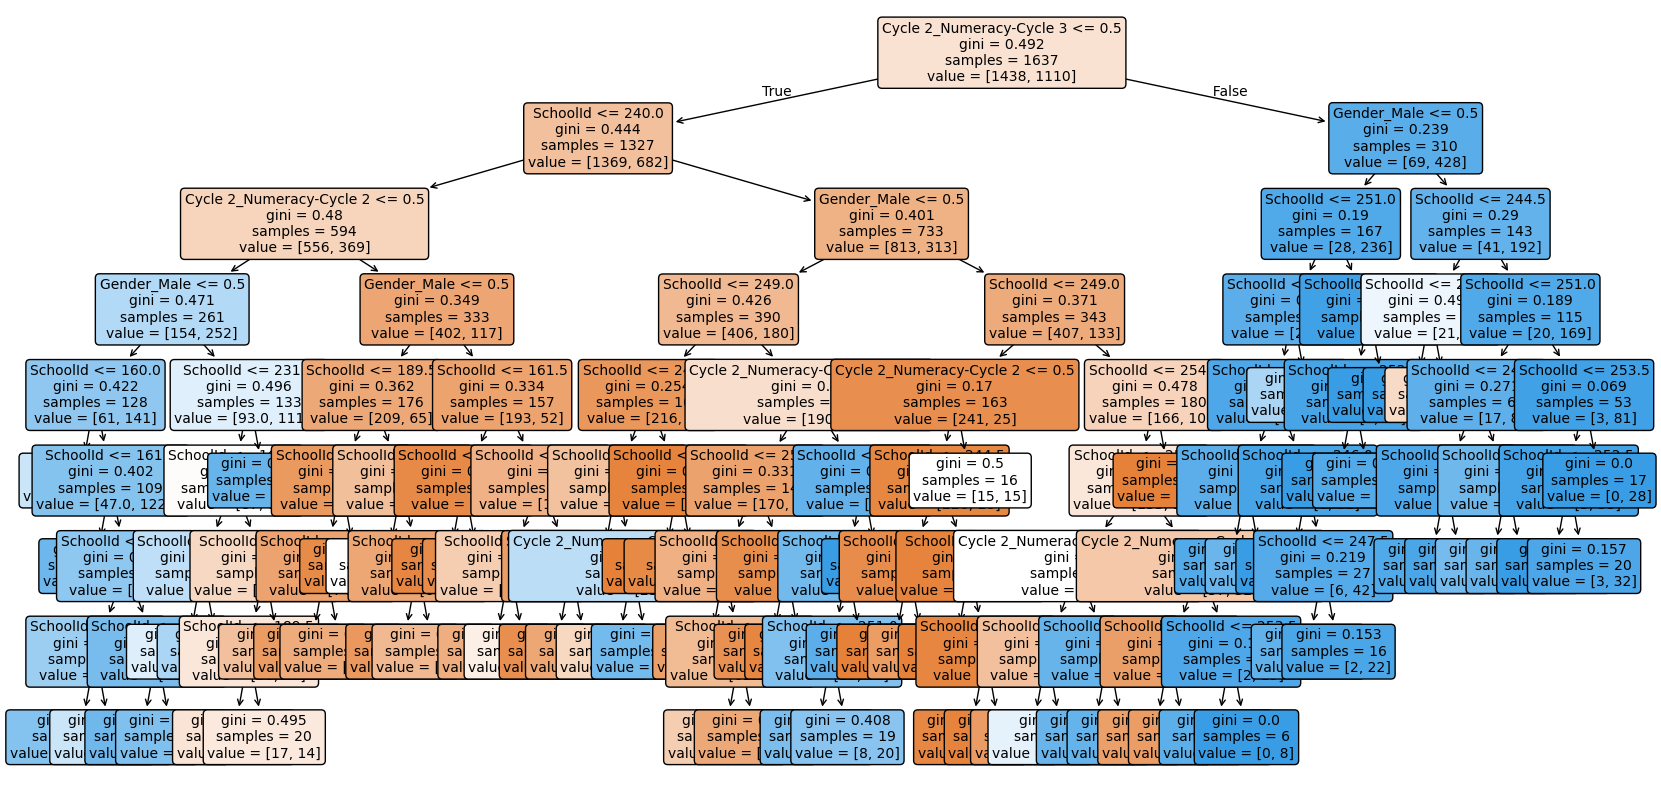

In [17]:
from sklearn.tree import plot_tree
tree = model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [13]:
numeracy_data = df_ug
def clean_level_name(level):
    if isinstance(level, str) and "Level" in level:
        return level.split("-")[0].strip()
    return level

numeracy_data['Baseline'] = numeracy_data['Baseline'].apply(clean_level_name)
numeracy_data['EoR1'] = numeracy_data['EoR1'].apply(clean_level_name)
numeracy_data['EoR2'] = numeracy_data['EoR2'].apply(clean_level_name)
numeracy_data['EoR3'] = numeracy_data['EoR3'].apply(clean_level_name)
numeracy_data.head()

,ChildrenId,AcademicYearName,AcademicYearId,Project,Year,Baseline,EoR1,EoR2,EoR3,Endline,...,EoR2_Endline,ImproveToLevel4Level5,Level4Achieved,Level5Achieved,AtLeastAchievedLevel4,Gender,IsCUCSatisfied?,Cycle 2,Identity_Number,SchoolId
0,36827,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2,Level 2,Level 3,NaN,NaN,...,NaN,0,0,0,0,Female,NaN,Numeracy-Cycle 1,20230301144429,248
1,37730,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2,Level 2,Level 2,NaN,NaN,...,NaN,0,0,0,0,Female,NaN,Numeracy-Cycle 1,20230227130059,248
2,36808,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2,Level 2,Level 3,NaN,NaN,...,NaN,0,0,0,0,Female,NaN,Numeracy-Cycle 1,20230302160714,248
3,36833,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2,Level 2,Level 2,NaN,NaN,...,NaN,0,0,0,0,Female,NaN,Numeracy-Cycle 1,20230301095638,248
4,36834,2023-Hempel-Numeracy-Cycle1,28,Hempel,2023,Level 2,Level 2,Level 2,NaN,NaN,...,NaN,0,0,0,0,Male,NaN,Numeracy-Cycle 1,20230301094740,248


In [79]:
numeracy_data = numeracy_data[numeracy_data['Cycle 2']=='Numeracy-Cycle 2']

def build_node_link():
    link = []
    nodes = []
    node_set = set()

    status = ['Baseline', 'EoR1', 'EoR2', 'EoR3']

    for i in range(len(status) - 1):
        s1 = status[i]
        s2 = status[i + 1]
        
        transition_counts = numeracy_data.groupby([s1, s2]).size().reset_index(name='count')

        for _, row in transition_counts.iterrows():
            if pd.notna(row[s1]) and pd.notna(row[s2]):
                link.append({
                    "source": f"{s1} {row[s1]}",
                    "target": f"{s2} {row[s2]}",
                    "value": row['count']
                })

    for link_entry in link:
        node_set.add(link_entry['source'])
        node_set.add(link_entry['target'])

    nodes = [{"name": node} for node in node_set]

    return nodes, link

nodes, links = build_node_link()

In [80]:
import asyncio
from aiohttp import TCPConnector, ClientSession

import pyecharts.options as opts
from pyecharts.charts import Sankey

async def get_json_data(url: str) -> dict:
    async with ClientSession(connector=TCPConnector(ssl=False)) as session:
        async with session.get(url=url) as response:
            return await response.json()

sankey = (
    Sankey()
    .add("Numeracy Progression", nodes, links, linestyle_opt=opts.LineStyleOpts(opacity=0.5, curve=0.5, color="source"), 
         label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Numeracy Level Progression"))
)


sankey.render("sankey_numeracy.html")

'/Users/qiaochufeng/Documents/GitHub/ds-save-the-children/project_early_insight/sankey_numeracy.html'

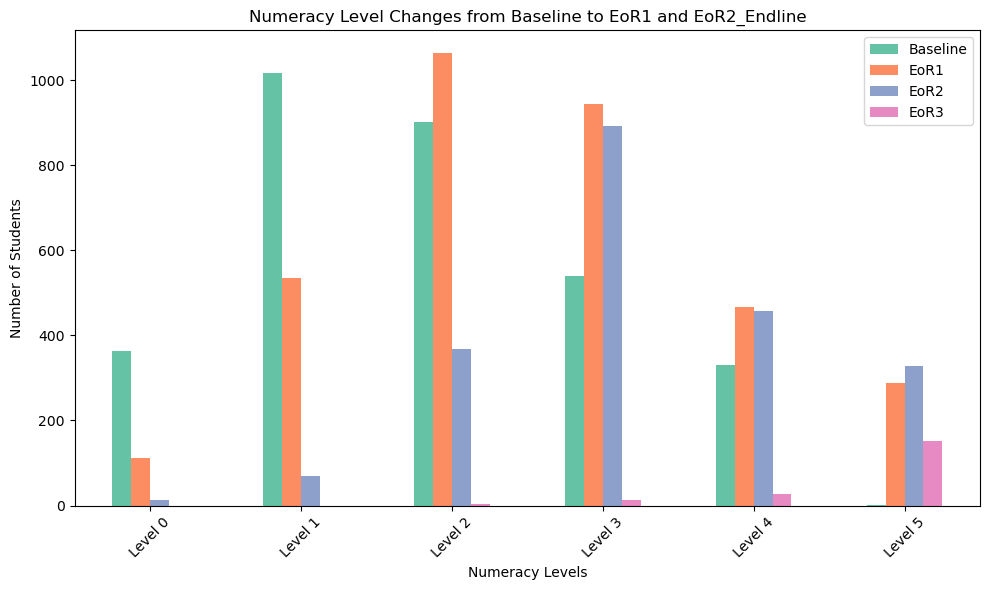

In [109]:
import seaborn as sns
colors = sns.color_palette("Set2", n_colors=4)

level_counts = numeracy_data[['Baseline', 'EoR1', 'EoR2', 'EoR3']].apply(pd.Series.value_counts)

level_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Numeracy Level Changes from Baseline to EoR1 and EoR2_Endline')
plt.ylabel('Number of Students')
plt.xlabel('Numeracy Levels')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [89]:
school_level_counts = numeracy_data.groupby('SchoolId')[['Baseline', 'EoR1', 'EoR2', 'EoR3']].apply(lambda x: x.apply(pd.Series.value_counts)).fillna(0)
school_level_counts


Baseline  EoR1  EoR2  EoR3
SchoolId                                    
159      Level 0      15.0   0.0   0.0   0.0
         Level 1      25.0  12.0   1.0   0.0
         Level 2      20.0  10.0   2.0   0.0
         Level 3      59.0  47.0  12.0   0.0
         Level 4      34.0  73.0  37.0   0.0
...                    ...   ...   ...   ...
255      Level 0       0.0  21.0  12.0   0.0
         Level 1      44.0  22.0  14.0   0.0
         Level 2      43.0  41.0  24.0   0.0
         Level 3      12.0  58.0  32.0   0.0
         Level 4       2.0   0.0   0.0   0.0

[85 rows x 4 columns]

In [95]:
def calculate_true_false_ratios(df, column):
    true_count = (df[column] == True).sum()
    false_count = (df[column] == False).sum()
    total = true_count + false_count
    return {
        'True': true_count / total if total > 0 else 0,
        'False': false_count / total if total > 0 else 0
    }

columns_to_calculate = ['ImproveToLevel4Level5', 'Level4Achieved', 'Level5Achieved', 'AtLeastAchievedLevel4']
true_false_ratios = {}

for school_id, group in numeracy_data.groupby('SchoolId'):
    true_false_ratios[school_id] = {
        column: calculate_true_false_ratios(group, column)
        for column in columns_to_calculate
    }

true_false_ratios_df = pd.DataFrame.from_dict({(school_id, column): data
                                               for school_id, columns in true_false_ratios.items()
                                               for column, data in columns.items()},
                                              orient='index')

true_false_ratios_df

True     False
159 ImproveToLevel4Level5  0.160000  0.840000
    Level4Achieved         0.505000  0.495000
    Level5Achieved         0.885000  0.115000
    AtLeastAchievedLevel4  0.330000  0.670000
161 ImproveToLevel4Level5  0.253061  0.746939
...                             ...       ...
254 AtLeastAchievedLevel4  0.609091  0.390909
255 ImproveToLevel4Level5  0.298611  0.701389
    Level4Achieved         0.298611  0.701389
    Level5Achieved         0.000000  1.000000
    AtLeastAchievedLevel4  0.312500  0.687500

[64 rows x 2 columns]

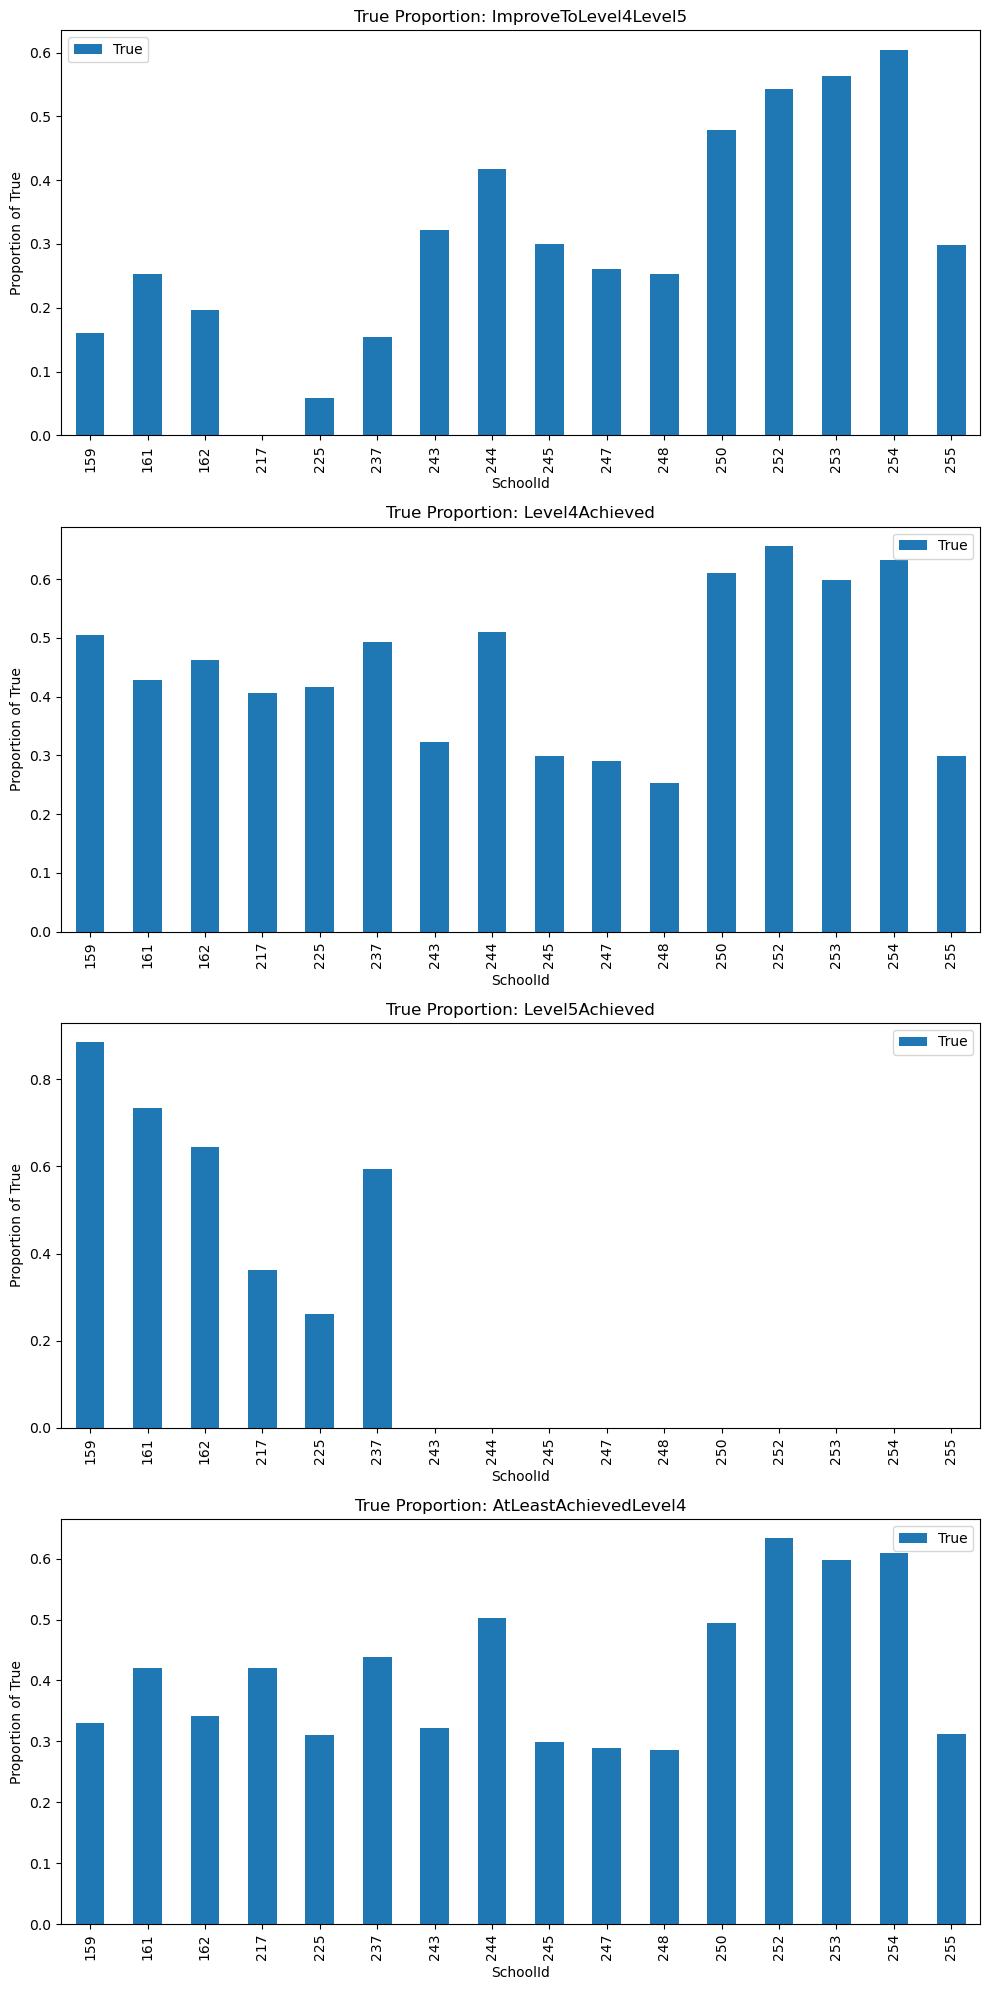

In [102]:
true_values_only = true_false_ratios_df[['True']]
improve_to_level4 = true_values_only.xs('ImproveToLevel4Level5', level=1)
level4_achieved = true_values_only.xs('Level4Achieved', level=1)
level5_achieved = true_values_only.xs('Level5Achieved', level=1)
at_least_level4 = true_values_only.xs('AtLeastAchievedLevel4', level=1)


fig, axes = plt.subplots(4, 1, figsize=(10, 20))
improve_to_level4.plot(kind='bar', ax=axes[0], title='True Proportion: ImproveToLevel4Level5')
axes[0].set_ylabel('Proportion of True')
axes[0].set_xlabel('SchoolId')
level4_achieved.plot(kind='bar', ax=axes[1], title='True Proportion: Level4Achieved')
axes[1].set_ylabel('Proportion of True')
axes[1].set_xlabel('SchoolId')
level5_achieved.plot(kind='bar', ax=axes[2], title='True Proportion: Level5Achieved')
axes[2].set_ylabel('Proportion of True')
axes[2].set_xlabel('SchoolId')
at_least_level4.plot(kind='bar', ax=axes[3], title='True Proportion: AtLeastAchievedLevel4')
axes[3].set_ylabel('Proportion of True')
axes[3].set_xlabel('SchoolId')

plt.tight_layout()
plt.show()


In [96]:
def calculate_state_ratios(df, column):
    in_count = (df[column] == 'Increase').sum()
    st_count = (df[column] == 'Stayed The Same').sum()
    de_count = (df[column] == 'Decrease').sum()
    total = in_count+st_count+de_count
    return {
        'Increase': in_count / total if total > 0 else 0,
        'Stayed The Same': st_count / total if total > 0 else 0,
        'Decrease': de_count / total if total > 0 else 0
    }

columns_to_calculate = ['Baseline_Endline','Baseline_EoR1', 'EoR1_EoR2', 'EoR2_EoR3', 'EoR2_Endline']
state_ratios = {}

for school_id, group in numeracy_data.groupby('SchoolId'):
    state_ratios[school_id] = {
        column: calculate_state_ratios(group, column)
        for column in columns_to_calculate
    }

state_ratios_df = pd.DataFrame.from_dict({(school_id, column): data
                                               for school_id, columns in state_ratios.items()
                                               for column, data in columns.items()},
                                              orient='index')

state_ratios_df

Increase  Stayed The Same  Decrease
159 Baseline_Endline  0.000000         0.000000  0.000000
    Baseline_EoR1     1.000000         0.000000  0.000000
    EoR1_EoR2         0.845070         0.154930  0.000000
    EoR2_EoR3         1.000000         0.000000  0.000000
    EoR2_Endline      0.947368         0.052632  0.000000
...                        ...              ...       ...
255 Baseline_Endline  0.000000         0.000000  0.000000
    Baseline_EoR1     1.000000         0.000000  0.000000
    EoR1_EoR2         0.185185         0.703704  0.111111
    EoR2_EoR3         0.000000         0.000000  0.000000
    EoR2_Endline      1.000000         0.000000  0.000000

[80 rows x 3 columns]

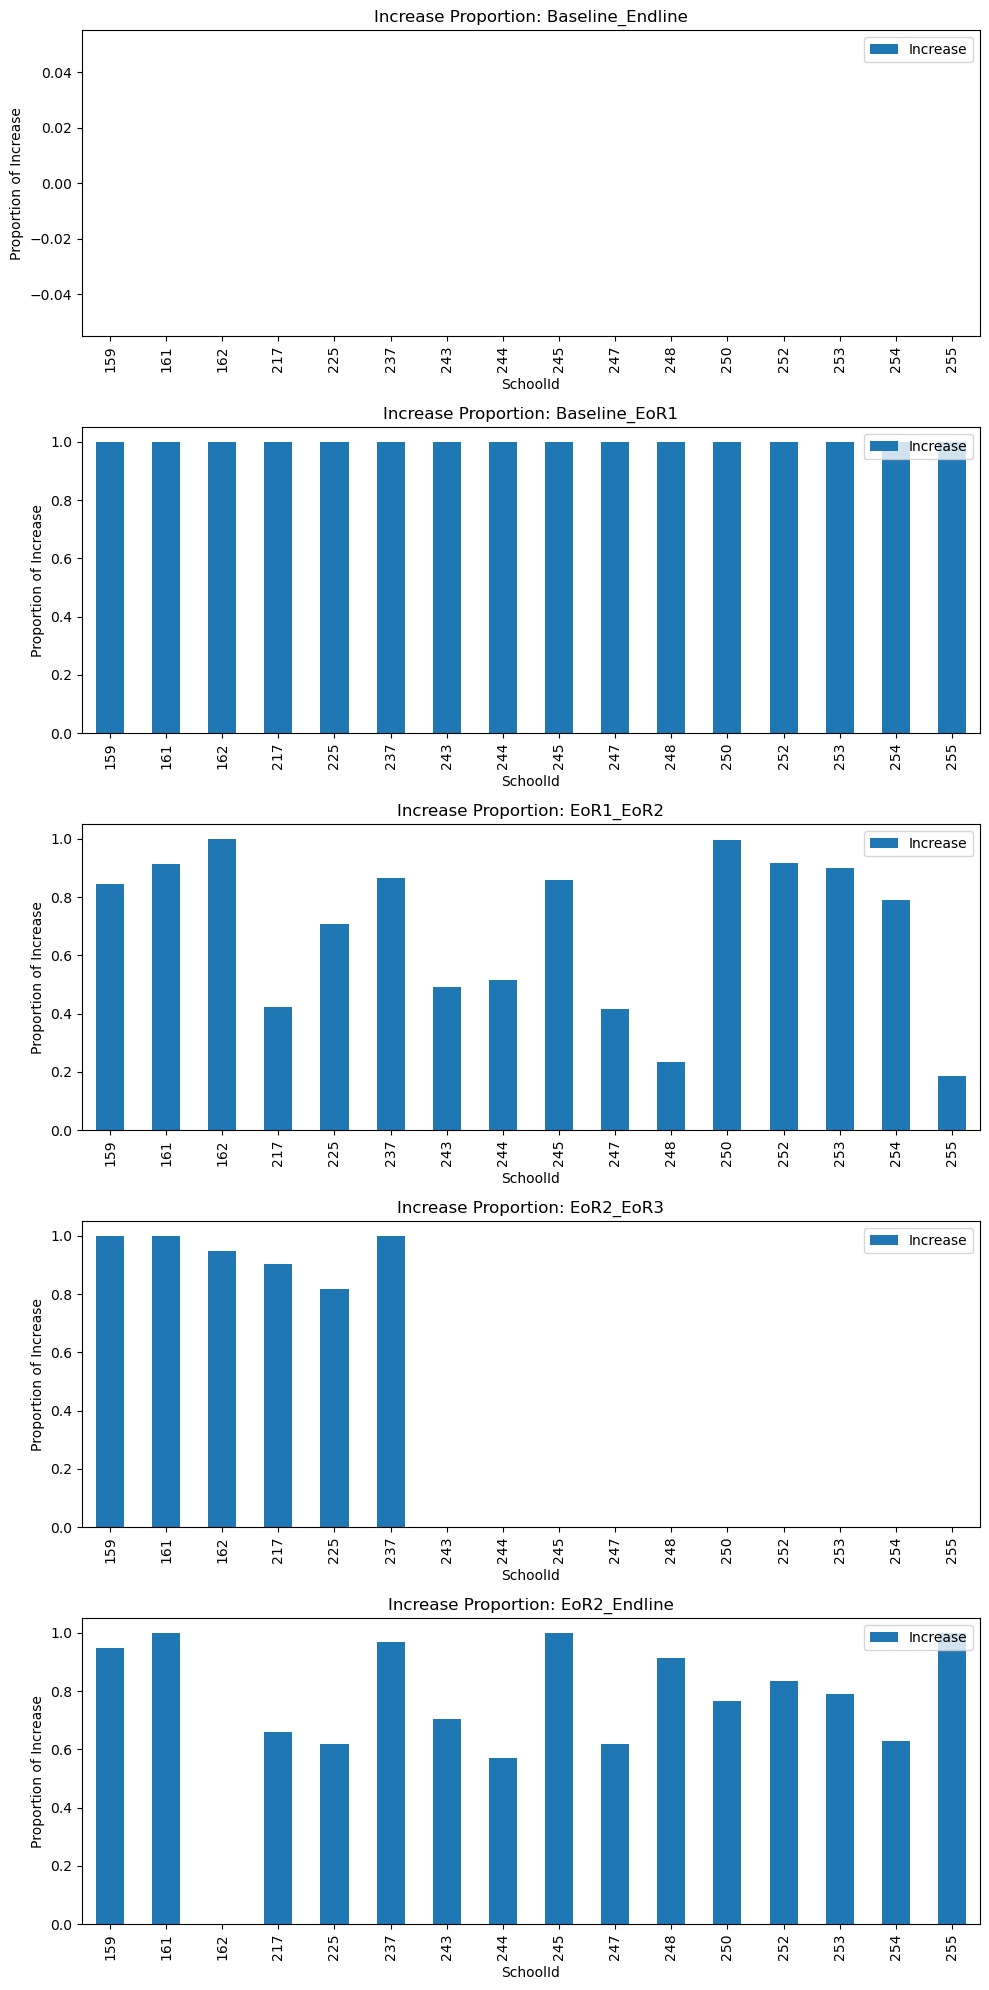

In [106]:
Increase_values_only = state_ratios_df[['Increase']]
Baseline_Endline = Increase_values_only.xs('Baseline_Endline', level=1)
Baseline_EoR1 = Increase_values_only.xs('Baseline_EoR1', level=1)
EoR1_EoR2 = Increase_values_only.xs('EoR1_EoR2', level=1)
EoR2_EoR3 = Increase_values_only.xs('EoR2_EoR3', level=1)
EoR2_Endline = Increase_values_only.xs('EoR2_Endline', level=1)


fig, axes = plt.subplots(5, 1, figsize=(10, 20))
Baseline_Endline.plot(kind='bar', ax=axes[0], title='Increase Proportion: Baseline_Endline')
axes[0].set_ylabel('Proportion of Increase')
axes[0].set_xlabel('SchoolId')
Baseline_EoR1.plot(kind='bar', ax=axes[1], title='Increase Proportion: Baseline_EoR1')
axes[1].set_ylabel('Proportion of Increase')
axes[1].set_xlabel('SchoolId')
EoR1_EoR2.plot(kind='bar', ax=axes[2], title='Increase Proportion: EoR1_EoR2')
axes[2].set_ylabel('Proportion of Increase')
axes[2].set_xlabel('SchoolId')
EoR2_EoR3.plot(kind='bar', ax=axes[3], title='Increase Proportion: EoR2_EoR3')
axes[3].set_ylabel('Proportion of Increase')
axes[3].set_xlabel('SchoolId')
EoR2_Endline.plot(kind='bar', ax=axes[4], title='Increase Proportion: EoR2_Endline')
axes[4].set_ylabel('Proportion of Increase')
axes[4].set_xlabel('SchoolId')

plt.tight_layout()
plt.show()


In [100]:
true_values

,,True,False
